In [171]:

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
import numpy as np
import pandas as pd
import os
import scipy 
import seaborn as sns

sns.set_style("white")
sns.set_context("notebook", font_scale=1.5)

col1 = "#1de8b5"
col2 = "#42a5f5"
col3 = "#ef5350"
col4 = "#ffca28"
col5 = "#7986cb"
col6 = "#f7f7f7"
col7 = "#8b9dc3"
col8 = "#3b5998"
clrs = [col1, col2, col3, col4, col5, col6, col7, col8]

results_folder = "/Users/annasintsova/git_repos/HUTI-RNAseq/results/virulence_factor_expression"
figures_folder = "/Users/annasintsova/git_repos/HUTI-RNAseq/figures/virulence_factor_expression"

cft_pa_matrix_file = "/Users/annasintsova/git_repos/HUTI-RNAseq/results/"\
                      "virulence_factor_expression/2018-05-18_cft_presence_absence_matrix.csv"
uti89_pa_matrix_file = "/Users/annasintsova/git_repos/HUTI-RNAseq/"\
                  "results/virulence_factor_expression/2018-05-18_presence_absence_matrix.csv"
    
cft_rpkm_matrix_file = "/Users/annasintsova/git_repos/HUTI-RNAseq/"\
                       "results/virulence_factor_expression/2018-05-18_cft_RPKM_matrix.csv"
uti89_rpkm_matrix_file = "/Users/annasintsova/git_repos/HUTI-RNAseq/"\
                       "results/virulence_factor_expression/2018-05-18_RPKM_matrix.csv"
    
meta_file = "/Users/annasintsova/git_repos/HUTI-RNAseq/results/virulence_factor_expression/virulence_factors_info.txt"
strain_info_file = "/Users/annasintsova/git_repos/HUTI-RNAseq/data/Patient_meta_info.csv"

In [120]:
cft_pa_matrix = pd.read_csv(cft_pa_matrix_file, index_col=0)
cft_pa_matrix = cft_pa_matrix.fillna(0)
uti89_pa_matrix = pd.read_csv(uti89_pa_matrix_file, index_col=0).fillna(0)
uti89_pa_matrix
meta = pd.read_csv(meta_file, index_col=0, header=None, names=["gene_name", "function"])
pa_matrix = pd.concat([cft_pa_matrix, uti89_pa_matrix])
pa_mat = meta.merge(pa_matrix, left_index=True, right_index=True).set_index("gene_name")
pa_mat.index.name=""
function = pa_mat.pop("function")
strain_info = pd.read_csv(strain_info_file, index_col=0)
strain_info["STRAIN"] = ["HM0" +s.split("HM")[1].strip("0") if int(s.split("HM")[1]) < 10 else s for s in strain_info.STRAIN ]

Index(['iutA', 'chuA', 'hma', 'iroN', 'fhuA', 'iha', 'ireA', 'feoB', 'iucC',
       'prrA', 'fyuA', 'hlyA', 'vat', 'pic', 'sat', 'cnf1', 'fimA', 'fimH',
       'focH', 'ydeA', 'yadC', 'yehA', 'aufA', 'aufD', 'yfcV', 'yfcU',
       'pilV-like', 'pilin', 'yagV', 'matA', 'cheW', 'cheY', 'fliC', 'motB',
       'motA', 'uspA', 'degS', 'tsr', 'ompT', 'ibeA'],
      dtype='object', name='gene_name')

//anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


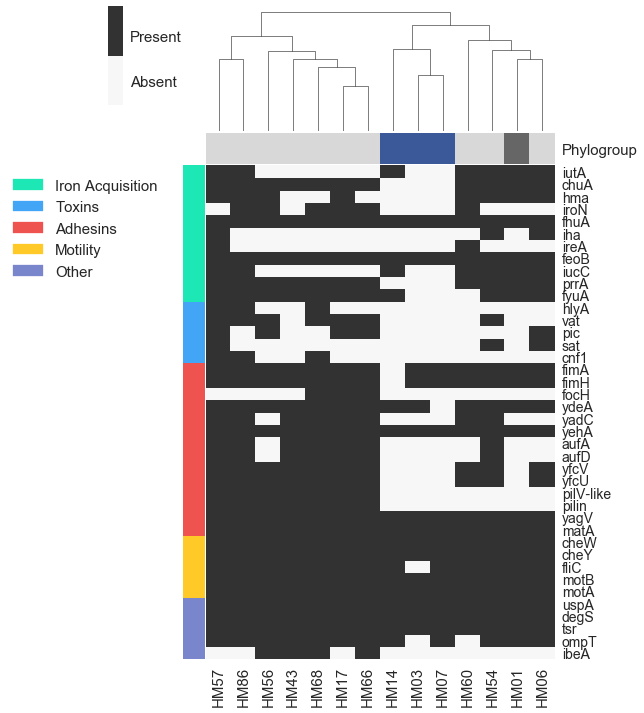

In [191]:
# Clustering the strains

strain_cluster = scipy.cluster.hierarchy.linkage(pa_mat.T, method="average")#distances between strains

# Mapping colors
num_colors = len(function.unique())# there's 5
function_to_color = dict(zip(function.unique(), clrs))
phylogroup_to_color = dict(zip(strain_info.PRED_PHYLO.unique(), ["#666666", col8, "#d8d8d8"]))
row_colors = function.map(function_to_color)
row_colors.name =""
col_colors = strain_pg.PRED_PHYLO.map(phylogroup_to_color)
col_colors.name="Phylogroup"
cmap = ListedColormap([col6, "#323232"])

#Drawind the heatmap
g = sns.clustermap(pa_mat, row_cluster=False, col_linkage=strain_cluster, 
                   row_colors=row_colors, col_colors=col_colors, cmap=cmap,
                  figsize = (8,12));

# Adjusting the x and y labels
la = g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_yticklabels(), rotation = 0, fontsize = 14);

# Creating Legend
function_legend = [mpl.patches.Patch(color=c, label=l) for l,c in function_to_color.items()]
pg_legend = [mpl.patches.Patch(color=c, label=l) for l,c in phylogroup_to_color.items()]
l2 = g.ax_heatmap.legend(handles=function_legend, bbox_to_anchor=(-0.1,1))
# Make a categorical colorbar

colorbar = g.ax_heatmap.collections[0].colorbar
colorbar.set_ticks([ 0.25, 0.7])
colorbar.set_ticklabels([ 'Absent', 'Present'])

g

In [187]:
cft_rpkm = pd.read_csv(cft_rpkm_matrix_file, index_col =0)
uti89_rpkm = pd.read_csv(uti89_rpkm_matrix_file, index_col=0)
rpkm_matrix = pd.concat([cft_rpkm, uti89_rpkm])
rpkm_matrix
rpkms = meta.merge(rpkm_matrix, left_index=True, right_index=True).set_index("gene_name")
rpkms_ur = rpkms[[c for c in rpkms.columns if "UR" in c ]]
rpkms_ur.columns = [c.split("_")[0] for c in rpkms_ur.columns]
rpkms_ur.index.name=""
rpkms_uti = rpkms[ [c for c in rpkms.columns if "UTI" in c ]]
rpkms_uti.columns = [c.split("_")[0] for c in rpkms_uti.columns]
rpkms_uti.index.name=""

//anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


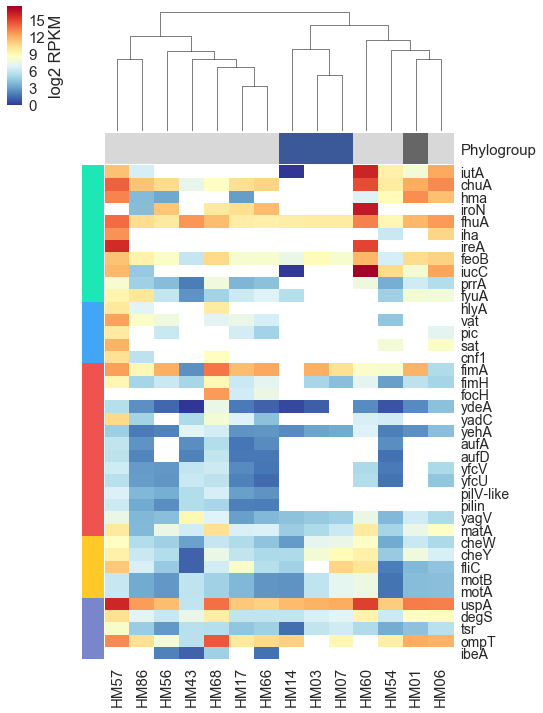

In [220]:
#URINE
cmap = mpl.cm.RdYlBu_r
cmap.set_bad(color='white')
#Drawind the heatmap
ur_h = sns.clustermap(np.log2(rpkms_ur+1), row_cluster=False, col_linkage=strain_cluster, 
                   row_colors=row_colors, col_colors=col_colors,cmap = cmap, 
                  figsize = (8,12), cbar_kws={"label":"log2 RPKM"});
# Adjusting the x and y labels
la = ur_h.ax_heatmap.set_yticklabels(ur_h.ax_heatmap.get_yticklabels(), rotation = 0, fontsize = 14);



//anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


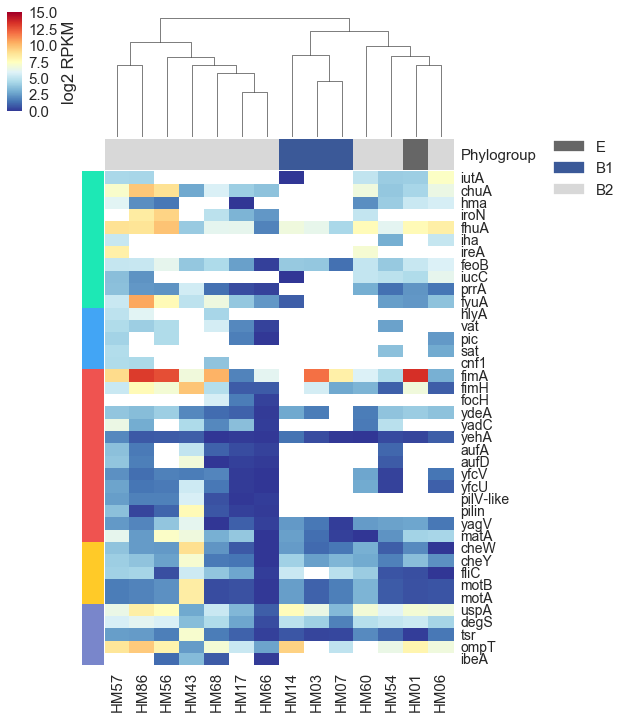

In [224]:
cmap = mpl.cm.RdYlBu_r
cmap.set_bad(color='white')
#Drawind the heatmap
uti_h = sns.clustermap(np.log2(rpkms_uti+1), row_cluster=False, col_linkage=strain_cluster, 
                   row_colors=row_colors, col_colors=col_colors,cmap = cmap, 
                  figsize = (8,12), cbar_kws={"label":"log2 RPKM"}, vmax=15);
# Adjusting the x and y labels
la = uti_h.ax_heatmap.set_yticklabels(uti_h.ax_heatmap.get_yticklabels(), rotation = 0, fontsize = 14);

l2 = uti_h.ax_heatmap.legend(handles=pg_legend, bbox_to_anchor=(1.5,1.09))

In [213]:
fig = plt.figure(figsize = (24,6))

a = uti_h.gca()
s = ur_h

AttributeError: 'ClusterGrid' object has no attribute 'gca'

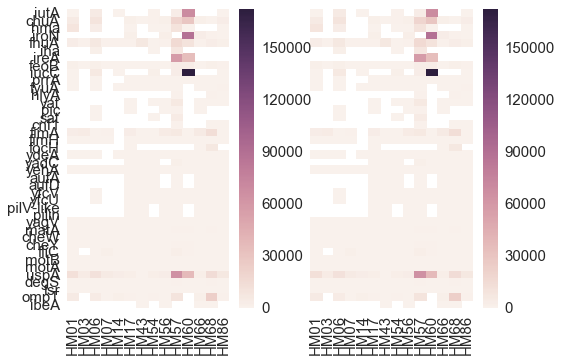

In [217]:
fig,axn = plt.subplots(1, 2, sharex=True, sharey=True)

for ax in axn.flat:
    sns.heatmap(rpkms_ur, ax=ax)